In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time


In [5]:
from sklearn.datasets import load_digits

In [6]:
digits=load_digits()

In [7]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

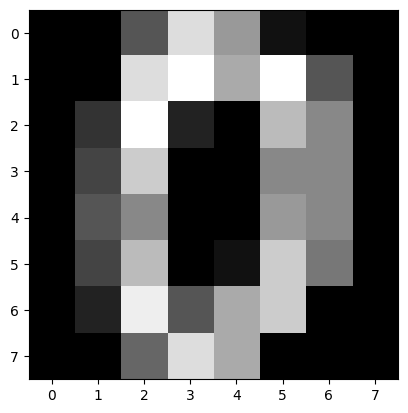

In [22]:
plt.imshow(digits.images[0], cmap=plt.get_cmap('gray'))

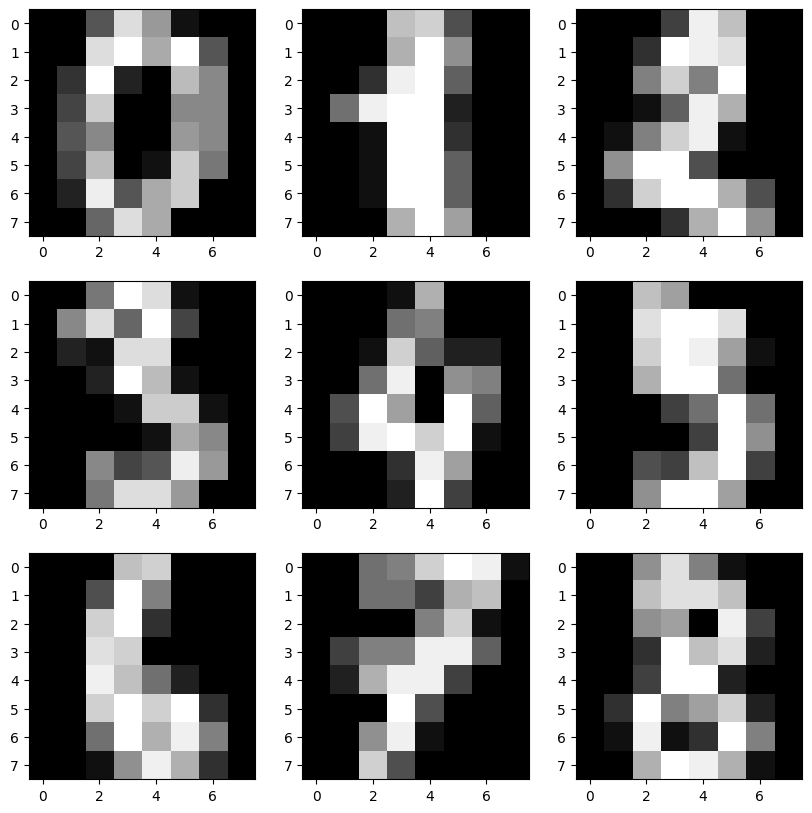

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a=0

for i in range(3):
    for j in range(3):
        axes[i,j].imshow(digits.images[a], cmap=plt.get_cmap('gray'))
        a = a+1
        
plt.show()

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
X=digits.data
y=digits.target

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [30]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

knn= OneVsRestClassifier(KNeighborsClassifier())

In [31]:
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [34]:
#predict for one observation/image

knn.predict(X_test[0].reshape(1,-1))

array([2])

In [36]:
#predict for multiple observations/images

knn.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [42]:
#predicitons on entire test data
predictions=knn.predict(X_test)

In [43]:
%time
print("Accuracy: ", accuracy_score(y_test,predictions))

CPU times: total: 0 ns
Wall time: 0 ns
Accuracy:  0.98


Text(0.5, 1.0, 'Accuracy Score: 0.98')

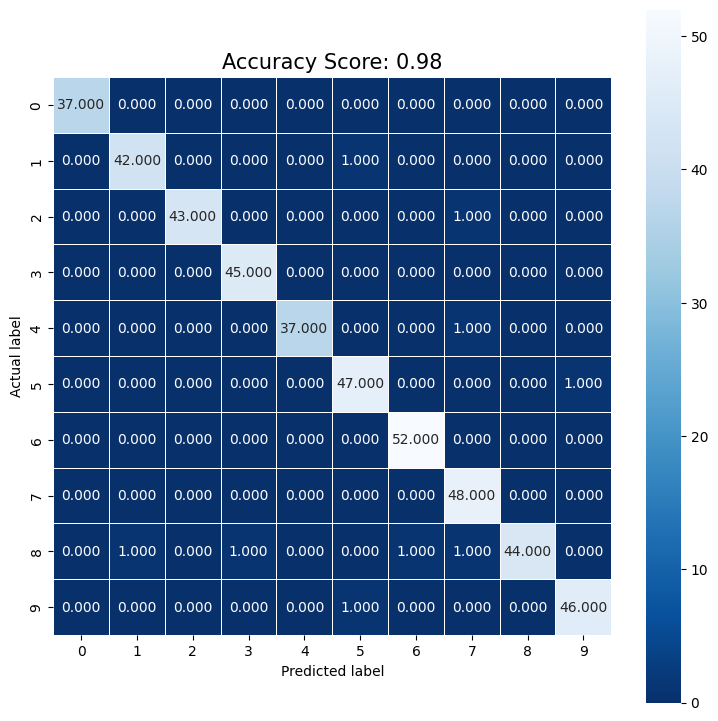

In [45]:
import seaborn as sns

cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)